# DATA ANALYSIS AND VISUALIZATION OF CRIMES REPORTED IN LOS ANGLES 

In [1]:
!Python --version

Python 3.11.5


In [2]:
#importing all the required libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import calendar
import folium
from datetime import datetime

In [3]:
#https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8 (data source)
df=pd.read_csv(r"Crime_Data_from_2020_to_Present.csv") # reading csv file

# Data Cleaning and Description


In [4]:
df.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   

    Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0   Adult Other    624.0      NaN       NaN      NaN   
1   Invest Cont    624.0      NaN       NaN      NaN   
2  Adult Arrest    845.0      NaN       NaN      NaN   
3   Invest Cont    745.0    998.0       NaN      NaN   
4   Invest Cont    740.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    200 E  6TH                          ST          NaN  34.0448 -118.2474  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468  

[5 rows x 28 columns]

In [5]:
#shows the stastical measures of each numerical column
display(df.describe())

DR_NO       TIME OCC           AREA    Rpt Dist No  \
count  8.435140e+05  843514.000000  843514.000000  843514.000000   
mean   2.165359e+08    1336.124087      10.707493    1117.181555   
std    1.095558e+07     653.818714       6.096013     609.593376   
min    8.170000e+02       1.000000       1.000000     101.000000   
25%    2.102142e+08     900.000000       6.000000     615.000000   
50%    2.202101e+08    1415.000000      11.000000    1141.000000   
75%    2.221141e+08    1900.000000      16.000000    1617.000000   
max    2.399306e+08    2359.000000      21.000000    2199.000000   

            Part 1-2         Crm Cd       Vict Age      Premis Cd  \
count  843514.000000  843514.000000  843514.000000  843504.000000   
mean        1.413064     500.783242      29.764563     305.893514   
std         0.492384     207.740379      21.791412     216.874954   
min         1.000000     110.000000      -3.000000     101.000000   
25%         1.000000     331.000000       6.000000     101.000000   
50%         1.000000     442.000000      31.000000     203.000000   
75%         2.000000     626.000000      45.000000     501.000000   
max         2.000000     956.000000     120.000000     976.000000   

       Weapon Used Cd       Crm Cd 1      Crm Cd 2     Crm Cd 3    Crm Cd 4  \
count   293900.000000  843503.000000  61921.000000  2093.000000   61.000000   
mean       363.139932     500.521485    957.557872   983.678452  990.868852   
std        123.710112     207.527338    111.289351    52.770258   27.690236   
min        101.000000     110.000000    210.000000   310.000000  821.000000   
25%        310.000000     331.000000    998.000000   998.000000  998.000000   
50%        400.000000     442.000000    998.000000   998.000000  998.000000   
75%        400.000000     626.000000    998.000000   998.000000  998.000000   
max        516.000000     956.000000    999.000000   999.000000  999.000000   

                 LAT            LON  
count  843514.000000  843514.000000  
mean       33.982143    -118.036519  
std         1.765990       6.122926  
min         0.000000    -118.667600  
25%        34.013800    -118.429600  
50%        34.058400    -118.321500  
75%        34.163100    -118.273900  
max        34.334300       0.000000

In [6]:
display(df.shape)

(843514, 28)

In [7]:
display(df.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [8]:
display(df.dtypes)

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [9]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           116954
Vict Age               0
Vict Sex          111316
Vict Descent      111324
Premis Cd             10
Premis Desc          510
Weapon Used Cd    549614
Weapon Desc       549614
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          781593
Crm Cd 3          841421
Crm Cd 4          843453
LOCATION               0
Cross Street      709048
LAT                    0
LON                    0
dtype: int64

In [10]:
#use dictionaries for filling in blank spaces of multiple columns
replacement_values = {
    'Mocodes'     : "X",
    'Vict Sex'    : "X",  # Replace null values in 'Vict Sex' column  with 'X'
    'Vict Descent': "X",        
    'Weapon Desc' : "X",
    'Cross Street': "X",
    'Premis Desc' : "X"
}
# Use fillna to fill null values in multiple columns at once
df.fillna(replacement_values, inplace=True)
replacement_number={
    'Premis Cd'     : 0,
    'Weapon Used Cd': 0,
    'Crm Cd 1'      : 0,
    'Crm Cd 2'      : 0,
    'Crm Cd 3'      : 0,
    'Crm Cd 4'      : 0,
    'Vict Age'      : 0
}
df.fillna(replacement_number,inplace=True)
df['Vict Age']=df['Vict Age'].replace(-1,0)
df['Vict Age']=df['Vict Age'].replace(-2,0)
subset = df.iloc[:, 1:30].head(5)
display(subset)

Date Rptd                DATE OCC  TIME OCC  AREA  \
0  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc         Mocodes  ...  \
0                           BATTERY - SIMPLE ASSAULT       0444 0913  ...   
1                           BATTERY - SIMPLE ASSAULT  0416 1822 1414  ...   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE            1501  ...   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)       0329 1402  ...   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...            0329  ...   

   Status   Status Desc Crm Cd 1  Crm Cd 2 Crm Cd 3  Crm Cd 4  \
0      AO   Adult Other    624.0       0.0      0.0       0.0   
1      IC   Invest Cont    624.0       0.0      0.0       0.0   
2      AA  Adult Arrest    845.0       0.0      0.0       0.0   
3      IC   Invest Cont    745.0     998.0      0.0       0.0   
4      IC   Invest Cont    740.0       0.0      0.0       0.0   

                                   LOCATION Cross Street      LAT       LON  
0   1100 W  39TH                         PL            X  34.0141 -118.2978  
1    700 S  HILL                         ST            X  34.0459 -118.2545  
2    200 E  6TH                          ST            X  34.0448 -118.2474  
3   5400    CORTEEN                      PL            X  34.1685 -118.4019  
4  14400    TITUS                        ST            X  34.2198 -118.4468  

[5 rows x 27 columns]

In [11]:
df.isnull().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

In [12]:
#this shows the unique values
display(df.nunique())

DR_NO             843514
Date Rptd           1420
DATE OCC            1420
TIME OCC            1439
AREA                  21
AREA NAME             21
Rpt Dist No         1206
Part 1-2               2
Crm Cd               138
Crm Cd Desc          138
Mocodes           280322
Vict Age             101
Vict Sex               5
Vict Descent          20
Premis Cd            314
Premis Desc          307
Weapon Used Cd        80
Weapon Desc           80
Status                 6
Status Desc            6
Crm Cd 1             141
Crm Cd 2             125
Crm Cd 3              38
Crm Cd 4               7
LOCATION           64162
Cross Street        9796
LAT                 5406
LON                 4971
dtype: int64

In [13]:
# Extract unique values from the 'Area' column
unique_areas = df['AREA NAME'].unique()

# Print or use the unique values as needed
print("Unique areas:", unique_areas)

Unique areas: ['Southwest' 'Central' 'N Hollywood' 'Mission' 'Devonshire' 'Northeast'
 'Harbor' 'Van Nuys' 'West Valley' 'West LA' 'Wilshire' 'Pacific'
 'Rampart' '77th Street' 'Hollenbeck' 'Southeast' 'Hollywood' 'Newton'
 'Topanga' 'Foothill' 'Olympic']


In [14]:
# Extracting Year and Month columns
Year=[]
Month=[]

for i in df['DATE OCC']:
    y=(i.split(" ")[0]).split("/")
    Year.append(y[2])
    Month.append(calendar.month_name[int(y[0])])
    
df["Year"] = Year
df["Month"]= Month

new_dataframe = df
subset = df.iloc[:, 26:30].head(5)
display(subset)

LAT       LON  Year     Month
0  34.0141 -118.2978  2020   January
1  34.0459 -118.2545  2020   January
2  34.0448 -118.2474  2020  February
3  34.1685 -118.4019  2020   January
4  34.2198 -118.4468  2020   January

In [15]:
#grouping down the data for each year
grouped = df.groupby('Year')
df_2020 = grouped.get_group('2020')
df_2021 = grouped.get_group('2021')
df_2022 = grouped.get_group('2022')

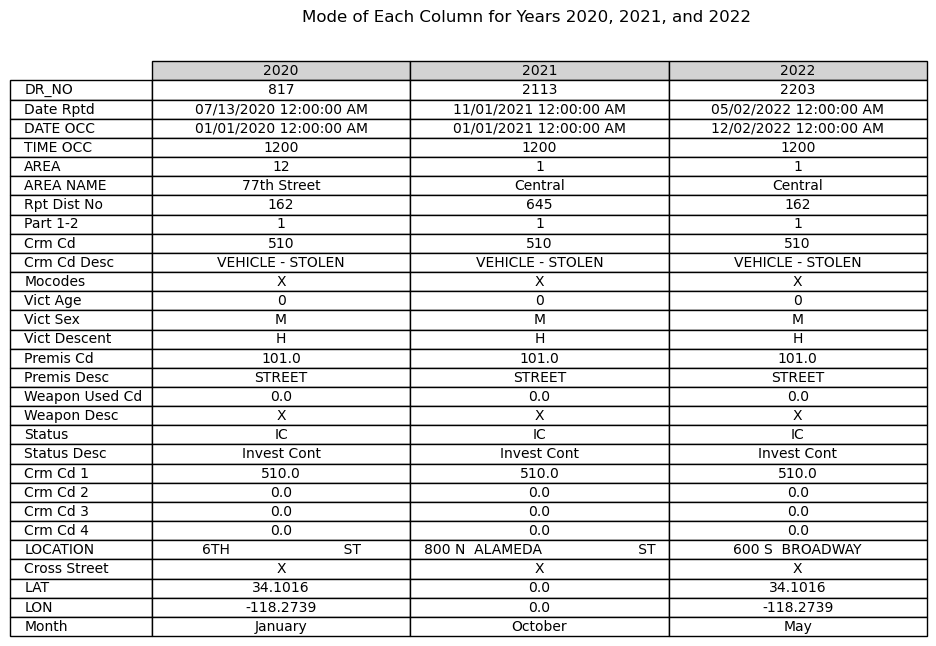

In [16]:
# Filtering data for years 2020, 2021, and 2022
filtered_df = df[df['Year'].isin(['2020', '2021', '2022'])]

# Group data by 'Year' and calculate mode for each column
grouped = filtered_df.groupby('Year').agg(lambda x: x.mode().iloc[0])

# Transpose the grouped data for visualization
transposed_data = grouped.transpose()

# Plotting the table
plt.figure(figsize=(10, 6))
table = plt.table(cellText=transposed_data.values,
                  rowLabels=transposed_data.index,
                  colLabels=transposed_data.columns.astype(str),
                  loc='center', cellLoc='center', colColours=['lightgrey']*len(transposed_data.columns))

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Adjust the cell size if needed

plt.axis('off')  # Hide the axes

# Move the title to the top
plt.text(0.5, 0.95, 'Mode of Each Column for Years 2020, 2021, and 2022',
         horizontalalignment='center', fontsize=12, transform=plt.gcf().transFigure)

plt.subplots_adjust(top=0.7)  # Adjust the top margin to fit the title

plt.show()

# Seasonal Variation in Crimes on Monthly Basis

In [17]:
#Calculating the count of each month
month_counts1 = df_2020['Month'].value_counts()
month_2020 = []
month_2020.append(2020)
month_counts2 = df_2021['Month'].value_counts()
month_2021 = []
month_2021.append(2021)
month_counts3 = df_2022['Month'].value_counts()
month_2022 = [] 
month_2022.append(2022)
print("Count of each month:")
print(month_counts1,month_counts2,month_counts3)

Count of each month:
Month
January      18493
February     17253
May          17204
July         17117
June         17033
August       16873
October      16490
March        16164
December     15945
April        15680
September    15636
November     15569
Name: count, dtype: int64 Month
October      19302
July         18659
August       18372
September    18359
November     18336
December     17923
June         17153
May          16988
January      16548
March        16319
April        16056
February     15411
Name: count, dtype: int64 Month
May          20413
October      20263
June         20197
August       20077
July         19948
December     19912
April        19784
March        19686
September    19276
November     18679
January      18442
February     17698
Name: count, dtype: int64


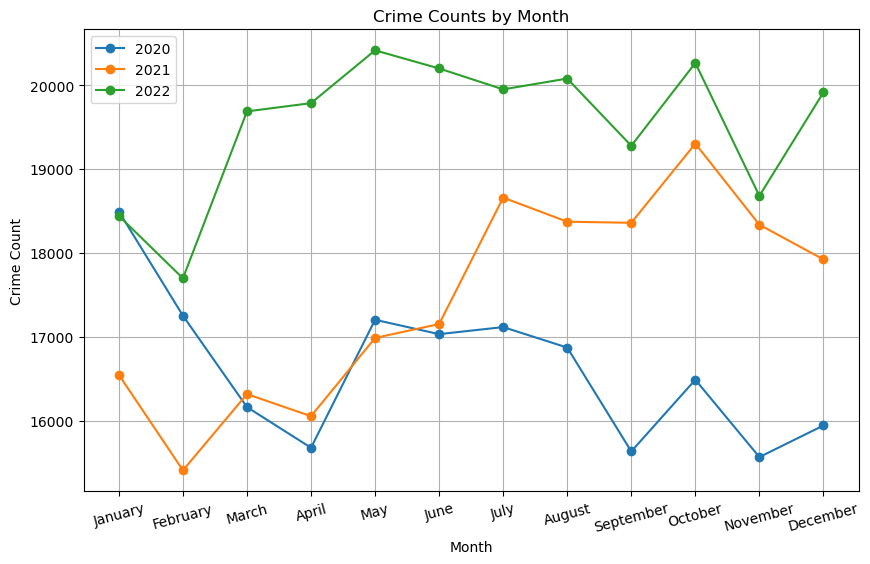

In [18]:
# Define the desired order of months
desired_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Data for 2020
month_counts_2020 = df_2020['Month'].value_counts().reindex(desired_order, fill_value=0)
months_2020 = month_counts_2020.index

# Data for 2021
month_counts_2021 = df_2021['Month'].value_counts().reindex(desired_order, fill_value=0)
months_2021 = month_counts_2021.index

# Data for 2022
month_counts_2022 = df_2022['Month'].value_counts().reindex(desired_order, fill_value=0)
months_2022 = month_counts_2022.index

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(months_2020, month_counts_2020, label='2020', marker='o')
plt.plot(months_2021, month_counts_2021, label='2021', marker='o')
plt.plot(months_2022, month_counts_2022, label='2022', marker='o')
plt.xticks(rotation=15) # Rotate x-axis labels for better visibily

plt.title('Crime Counts by Month')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.legend()
plt.grid(True)
plt.show()

Tabular Representation of Crime Counts for Seasons (2020-2022):
      Spring  Summer  Autumn  Winter
2020   49048   51023   47695   51691
2021   49363   54184   55997   49882
2022   59883   60222   58218   56052


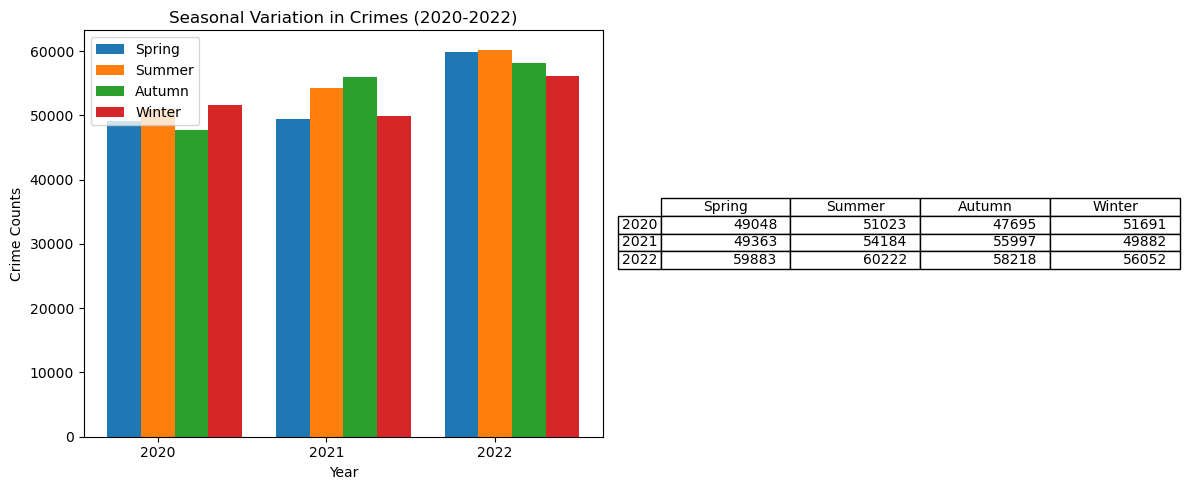

In [19]:
# Grouping the filtered data by 'Year'
grouped = filtered_df.groupby('Year')

# Extracting data for each year
years_data = {}
for year, group in grouped:
    years_data[year] = group['Month']

# Mapping months to seasons
seasons = {
    'Spring': ['March', 'April', 'May'],
    'Summer': ['June', 'July', 'August'],
    'Autumn': ['September', 'October', 'November'],
    'Winter': ['December', 'January', 'February']
}

# Counting occurrences of months in each season for each year
seasonal_counts = {season: {year: 0 for year in years_data} for season in seasons}

for season, months in seasons.items():
    for year, data in years_data.items():
        count = data[data.isin(months)].count()
        seasonal_counts[season][year] = count

# Creating a DataFrame for tabular representation
table_data = pd.DataFrame(seasonal_counts)

# Displaying tabular column
print("Tabular Representation of Crime Counts for Seasons (2020-2022):")
print(table_data)

# Visualization - Bar chart for seasonal variations over the years
seasons_data = {season: [] for season in seasons}
for season, counts in seasonal_counts.items():
    for year, count in counts.items():
        seasons_data[season].append(count)

# Creating the visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the bar chart
bar_width = 0.2
index = range(len(years_data))

for i, (season, data) in enumerate(seasons_data.items()):
    ax[0].bar([x + bar_width * i for x in index], data, bar_width, label=season)

ax[0].set_xlabel('Year')
ax[0].set_ylabel('Crime Counts')
ax[0].set_title('Seasonal Variation in Crimes (2020-2022)')
ax[0].set_xticks([x + bar_width for x in index])
ax[0].set_xticklabels(years_data.keys())
ax[0].legend()

# Plotting the tabular data
ax[1].axis('off')
ax[1].table(cellText=table_data.values,
            colLabels=table_data.columns,
            rowLabels=table_data.index,
            loc='center')

plt.tight_layout()
plt.show()

# Finding out Top 10 Crimes Commited

In [20]:
# Define a function to get the top n values within each group
def get_top_n(group, n=10):
    return group['Crm Cd Desc'].value_counts().head(n)

# Get the top 10 crimes for each AREA NAME
top_10_per_area_name = filtered_df.groupby(['AREA NAME']).apply(get_top_n, n=10)

# Get the top 10 AREA NAMES
top_10_areas = filtered_df['AREA NAME'].value_counts().head(10).index

# Display top 10 crimes per year
for year, top_10_areas in top_10_per_area_name.groupby(level=0):
    print(f"Top 10 crimes for {year}:")
    print(top_10_areas)
    print()


Top 10 crimes for 77th Street:
AREA NAME    Crm Cd Desc                                            
77th Street  VEHICLE - STOLEN                                           5164
             ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             4173
             BATTERY - SIMPLE ASSAULT                                   3048
             THEFT OF IDENTITY                                          2969
             INTIMATE PARTNER - SIMPLE ASSAULT                          2865
             ROBBERY                                                    2613
             VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    2314
             BURGLARY                                                   1428
             VANDALISM - MISDEAMEANOR ($399 OR UNDER)                   1361
             THEFT PLAIN - PETTY ($950 & UNDER)                         1280
Name: count, dtype: int64

Top 10 crimes for Central:
AREA NAME  Crm Cd Desc                                             
Central 

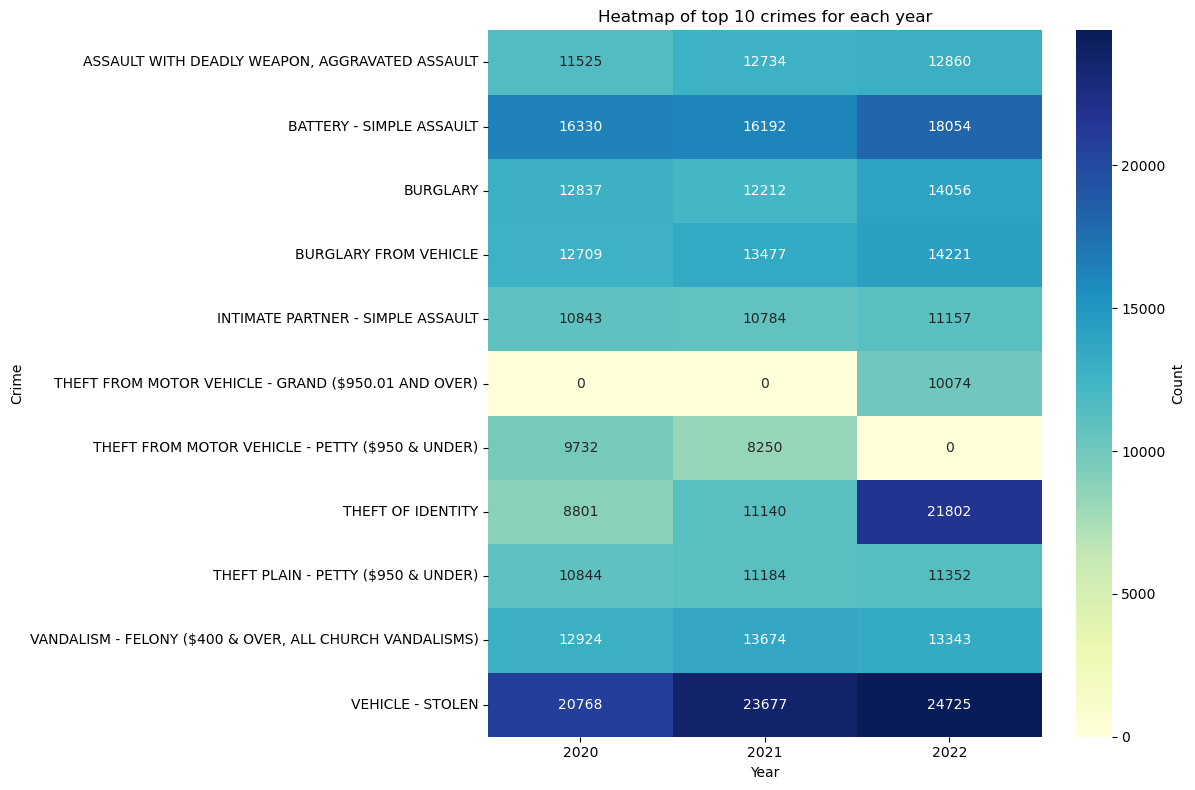

In [21]:
# Get the top 10 crimes for each year
top_10_per_year = filtered_df.groupby('Year')['Crm Cd Desc'].value_counts().groupby(level=0).head(10)

# Reset index to make 'Year' and 'Crm Cd Desc' columns
top_10_per_year = top_10_per_year.reset_index(name='Count')

# Pivot the data to create a matrix of crimes vs. areas for each year
heatmap_data = top_10_per_year.pivot(index='Crm Cd Desc', columns='Year', values='Count').fillna(0)

# Display the heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Count'})
plt.title('Heatmap of top 10 crimes for each year')
plt.xlabel('Year')
plt.ylabel('Crime')
plt.tight_layout()
plt.show()

# Weekly Analysis and Visualization of Crimes

0         Wednesday
1         Wednesday
2          Thursday
3         Wednesday
4         Wednesday
            ...    
843509    Wednesday
843510    Wednesday
843511     Saturday
843512       Sunday
843513     Thursday
Name: Weekday, Length: 843514, dtype: object


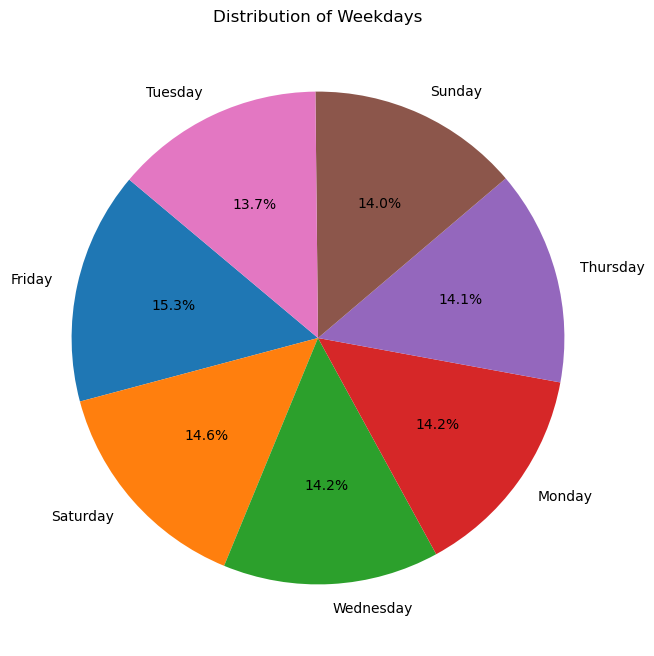

In [22]:
from datetime import datetime
import matplotlib.pyplot as plt

# Assuming your date strings have the format MM/DD/YYYY HH:MM:SS AM/PM
df['Date'] = pd.to_datetime(df['DATE OCC'], format="%m/%d/%Y %H:%M:%S %p")

# Extract the weekday and add it as a new column
df['Weekday'] = df['Date'].dt.strftime('%A')

# Display the DataFrame
print(df['Weekday'])

# Extract the weekday and count occurrences
weekday_counts = df['Weekday'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weekday_counts, labels=weekday_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Weekdays')
plt.show()


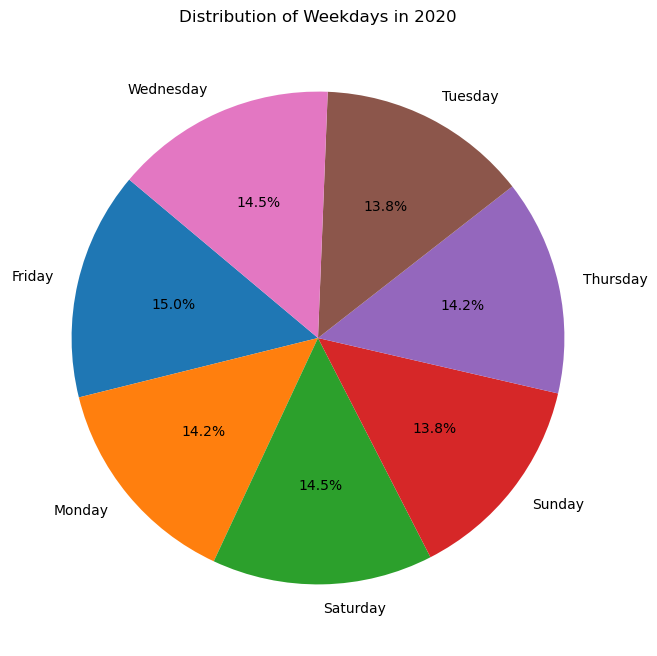

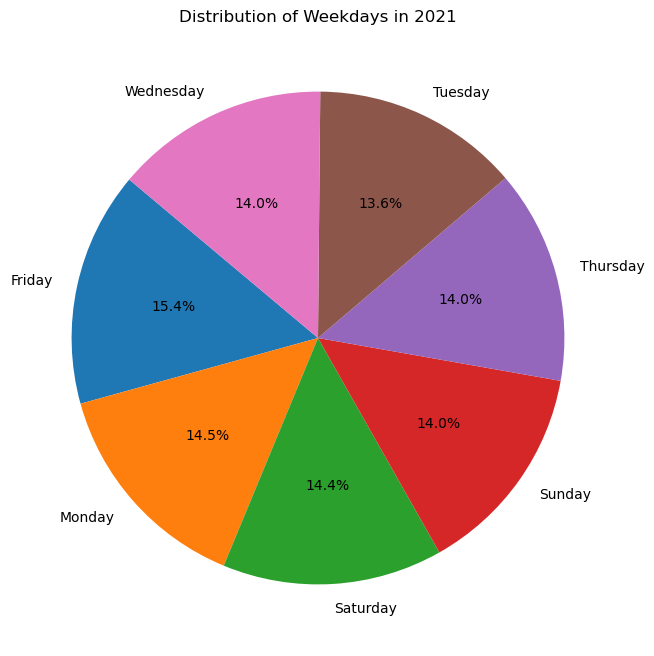

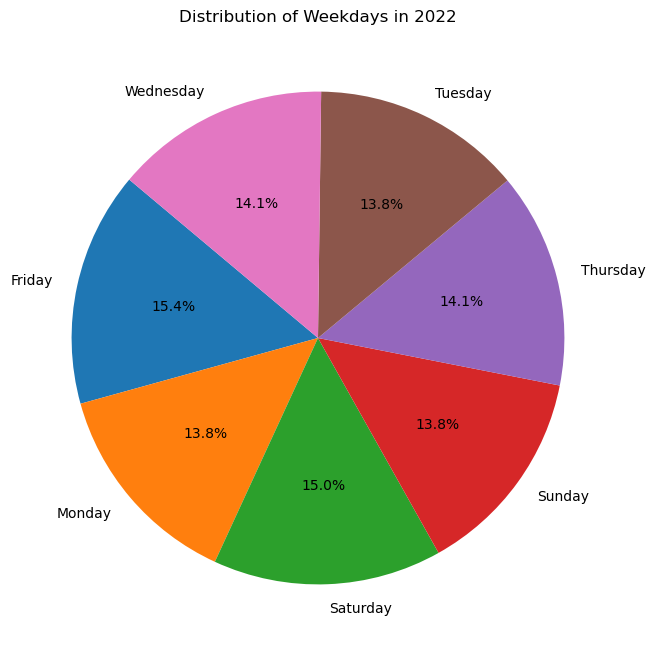

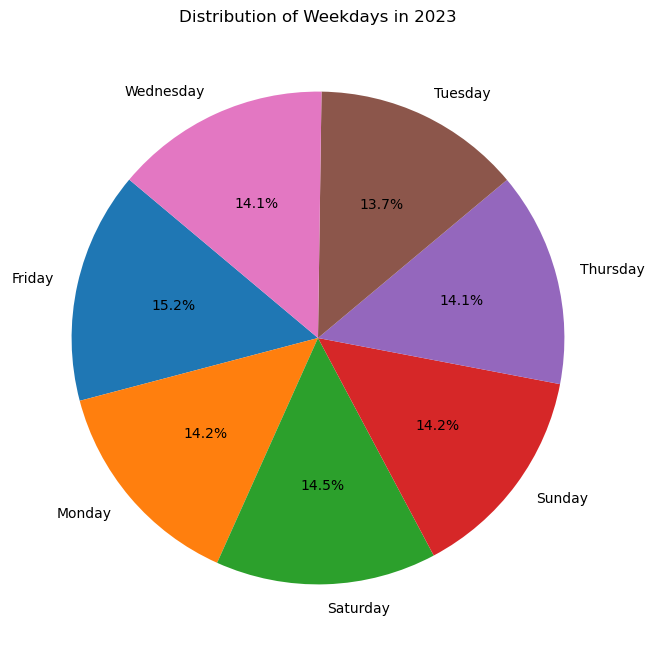

In [23]:
# Extract the year and weekday
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.strftime('%A')

# Group by year and weekday, and count occurrences
grouped_data = df.groupby(['Year', 'Weekday']).size().reset_index(name='Count')

# Create a pie chart for each year
for year, year_data in grouped_data.groupby('Year'):
    plt.figure(figsize=(8, 8))
    plt.pie(year_data['Count'], labels=year_data['Weekday'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Weekdays in {year}')
    plt.show()

# Map Visualization of Los Angles

In [25]:
import folium
from IPython.display import display

# Assuming df is your DataFrame
data = df.head(2500)[["LAT", 'LON', 'AREA NAME']]

# Create a base map
map_center = [34.0522, -118.2437]  # You can adjust this center as needed
my_map = folium.Map(location=map_center, zoom_start=10)

# Define a color mapping for each unique area name
area_colors = {
    'Southwest': 'red',
    'Central': 'blue',
    'N Hollywood': 'green',
    'Mission': 'orange',
    'Devonshire': 'purple',
    'Northeast': 'cyan',
    'Harbor': 'pink',
    'Van Nuys': 'brown',
    'West Valley': 'lightblue',
    'West LA': 'lightgreen',
    'Wilshire': 'darkred',
    'Pacific': 'darkblue',
    'Rampart': 'darkgreen',
    '77th Street': 'darkpurple',
    'Hollenbeck': 'darkcyan',
    'Southeast': 'darkpink',
    'Hollywood': 'gray',
    'Newton': 'lightred',
    'Topanga': 'lightgray',
    'Foothill': 'lightpurple',
    'Olympic': 'lightpink'
}

# Add markers for each coordinate
for index, row in data.iterrows():
    area_name = row["AREA NAME"]
    color = area_colors.get(area_name, "gray")  # Default to gray if not found in the mapping
    folium.Marker(
        location=[row["LAT"], row["LON"]],
        popup=f"Area: {area_name}",
        icon=folium.Icon(color=color),
    ).add_to(my_map)

# Display the map
display(my_map)


C:\Users\Taher\AppData\Local\Temp\ipykernel_8936\421167753.py:43: UserWarning: color argument of Icon should be one of: {'lightred', 'black', 'darkgreen', 'white', 'red', 'darkblue', 'lightgreen', 'orange', 'lightblue', 'blue', 'gray', 'darkpurple', 'cadetblue', 'lightgray', 'green', 'pink', 'purple', 'darkred', 'beige'}.
  icon=folium.Icon(color=color),


As I couldn't plot all the 800k rows just visualized taking sample of 2,500 rows

# FINDINGS AND HYPOTHESES

The most prevalent type of crime in Los Angeles for the years 2020, 2021, and 2023 was Vehicle-Stolen. In 2020, the crime hotspot was identified at 77th street, while in 2021 and 2022, the central area of Los Angeles stood out. A considerable number of victims were male, and details regarding the age and ethnic background of the victims were often unavailable. In 2020, January witnessed the highest crime count at 18,493 cases, while in 2021, October had the peak with 19,302 cases, and in 2022, May recorded the highest count at 20,413 cases. The trend indicates a consistent increase in crimes each year, signaling a rising crime rate in Los Angeles. This underscores the importance for citizens to be more vigilant and take precautions to protect themselves. Over the three years, seasonal patterns were observed, with summer registering the highest number of crimes, followed by autumn, winter, and spring. Fridays emerged as the most common day for crimes, accounting for about 15% of incidents across all three years.